In [1]:
import pandas as pd

In [5]:
data = pd.read_excel('malaysia_towns.xlsx')
data.columns = ['town', 'state']
data.head()

,town,state
0,Kuala Lumpur,Federal Territories
1,Kajang,Selangor
2,Seberang Perai,Penang
3,Subang Jaya,Selangor
4,Klang,Selangor


In [8]:
# perform geocoding to the city
import pandas as pd
import numpy as np
import geopandas as gpd
from geopy.geocoders import Nominatim

geolocator = Nominatim(user_agent="u2004763@siswa.um.edu.my")

# geocoding function
def my_geocoder(row):
    try:
        point = geolocator.geocode(row).point
        return pd.Series({'Latitude': point.latitude, 'Longitude': point.longitude})
    except:
        return pd.Series({'Latitude': None, 'Longitude': None})

data[['Latitude', 'Longitude']] = data.apply(lambda x: my_geocoder(x['town']), axis=1)

# check the percentage of data successfully geocoded
print("{}% of addresses were geocoded!".format(
    (1 - sum(np.isnan(data["Latitude"])) / len(data)) * 100))

100.0% of addresses were geocoded!


In [9]:
data = gpd.GeoDataFrame(
    data, geometry=gpd.points_from_xy(data.Longitude, data.Latitude))
data.crs = {'init': 'epsg:4326'}
data.head()

c:\Users\Khor Kean Teng\AppData\Local\Programs\Python\Python311\Lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


,town,state,Latitude,Longitude,geometry
0,Kuala Lumpur,Federal Territories,3.139310,101.682113,POINT (101.68211 3.13931)
1,Kajang,Selangor,2.994844,101.789659,POINT (101.78966 2.99484)
2,Seberang Perai,Penang,5.353882,100.457237,POINT (100.45724 5.35388)
3,Subang Jaya,Selangor,3.051487,101.582334,POINT (101.58233 3.05149)
4,Klang,Selangor,49.319800,6.372200,POINT (6.37220 49.31980)


In [12]:
# update the file
# data.to_excel('data/malaysia_towns.xlsx', index=False)

In [19]:
# computing the min distance to the town
location = pd.read_csv('regression_data.csv')

In [20]:
geocoded_data = gpd.GeoDataFrame(location, geometry = gpd.points_from_xy(location.longitude, location.latitude), crs = "EPSG:4326").to_crs('EPSG:3857')
town_data = gpd.GeoDataFrame(data, geometry = gpd.points_from_xy(data.Longitude, data.Latitude), crs = "EPSG:4326").to_crs('EPSG:3857')

In [23]:
# write a function to compute for the minimum distances from any flood point
random_location = geocoded_data.iloc[360]
town_distances = town_data.geometry.distance(random_location.geometry)
town_distances.min()

for i in range(0, len(geocoded_data)):
    town_distances = town_data.geometry.distance(geocoded_data.iloc[i].geometry)
    geocoded_data.loc[i, 'town_distance'] = town_distances.min()

In [24]:
geocoded_data.head()

,latitude,longitude,region,state,postcode,geometry,flood_risk,distance,kawasan_banjir,latitude_kb,longitude_kb,kedalaman_banjir,month_kb,altitude,slope,min_distance_river,land_cover,town_distance
0,6.402858,100.098777,Kangar,Perlis,1000,POINT (11142944.907 714251.095),False,4245.737601,Kampung Nelayan,6.4040,100.1369,0.6,4.0,0,0.000000,2866.669879,200,11394.621769
1,6.365790,100.188445,Kangar,Perlis,1000,POINT (11152926.670 710098.960),False,4532.533863,Kampung Sentua,6.4051,100.1981,0.2,10.0,4,2.075604,2520.893227,40,8220.642421
2,6.360280,100.212395,Kangar,Perlis,1000,POINT (11155592.794 709481.714),False,5266.664356,Kampung Sentua,6.4051,100.1981,0.2,10.0,5,2.075599,394.344896,40,9033.156201
3,6.557335,100.314105,Kangar,Perlis,1000,POINT (11166915.133 731557.973),False,8652.136771,Taman Beseri Jaya,6.5590,100.2364,0.6,5.0,59,0.933516,2065.659934,126,18796.430267
4,6.395771,100.230483,Kangar,Perlis,1000,POINT (11157606.330 713457.232),False,3753.265280,Kampung Sentua,6.4051,100.1981,0.2,10.0,5,0.927410,2072.528557,40,6279.729808


In [26]:
geocoded_data.tail()

,latitude,longitude,region,state,postcode,geometry,flood_risk,distance,kawasan_banjir,latitude_kb,longitude_kb,kedalaman_banjir,month_kb,altitude,slope,min_distance_river,land_cover,town_distance
19819,4.861237,115.406857,Lawas,Sarawak,98857,POINT (12847032.566 541800.827),True,317.342199,Bandar Lawas,4.859,115.4051,0.15,9.0,11,4.143626,315.745534,50,98238.732914
19820,4.861249,115.406919,Lawas,Sarawak,98857,POINT (12847039.490 541802.194),True,322.719373,Bandar Lawas,4.859,115.4051,0.15,9.0,10,2.931484,312.397021,50,98232.152365
19821,4.861206,115.406885,Lawas,Sarawak,98857,POINT (12847035.672 541797.441),True,316.622942,Bandar Lawas,4.859,115.4051,0.15,9.0,11,4.143626,311.157523,50,98237.921412
19822,4.861273,115.406945,Lawas,Sarawak,98857,POINT (12847042.396 541804.920),True,326.665809,Bandar Lawas,4.859,115.4051,0.15,9.0,10,2.931484,312.653287,50,98228.238919
19823,4.861271,115.406852,Lawas,Sarawak,98857,POINT (12847032.043 541804.633),True,320.029117,Bandar Lawas,4.859,115.4051,0.15,9.0,11,4.143626,319.015807,50,98237.137679


In [27]:
geocoded_data['town_distance'].describe()

count     19824.000000
mean      16447.459433
std       18087.364621
min         181.210220
25%        5802.998856
50%       10951.282859
75%       18798.056593
max      133517.266498
Name: town_distance, dtype: float64

C:\Users\Khor Kean Teng\AppData\Local\Temp\ipykernel_8892\367905311.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(geocoded_data['town_distance'], bins=20)


<Axes: xlabel='town_distance', ylabel='Density'>

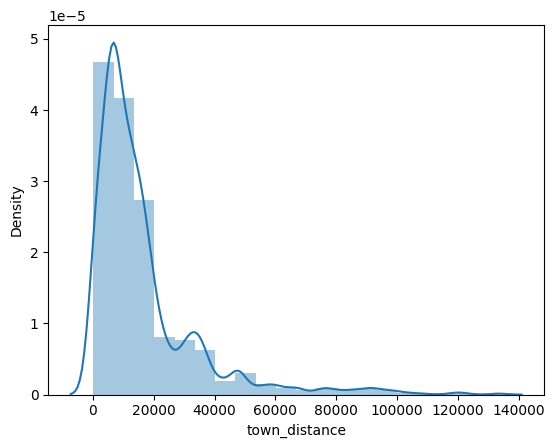

In [28]:
import seaborn as sns

sns.distplot(geocoded_data['town_distance'], bins=20)

In [29]:
# update the regression data
geocoded_data.to_csv('regression_data.csv', index=False)